## CNN - Example

In [1]:
import os
import zipfile
import tensorflow as tf

### Load Dataset

In [ ]:
# using wget

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

In [2]:
# using python code

URL = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"
# filename = "c:\\Sandbox\\GitHub\\TF_786\\horse-or-human.zip"   # windows
filename = "/content/horse-or-human.zip"                       # unix

zip_file = tf.keras.utils.get_file(origin=URL,
                                   fname=filename,
                                   extract=True)

149577728/149574867 [==============================] - 1s 0us/step


### Pre-Process data

In [4]:
#filepath = 'c:\\Sandbox\\GitHub\\TF_786\\'
filepath = '/content/'

local_zip = filepath + 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(filepath + 'horse-or-human')
zip_ref.close()

In [5]:
# Directory with our training horse pictures
#train_horse_dir = os.path.join(filepath + 'horse-or-human//horses')
train_horse_dir = os.path.join(filepath + 'horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join(filepath + 'horse-or-human//humans')
#train_horse_dir = os.path.join(filepath + 'horse-or-human/horses')

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse17-4.png', 'horse33-7.png', 'horse22-6.png', 'horse03-3.png', 'horse38-1.png', 'horse17-6.png', 'horse14-2.png', 'horse46-9.png', 'horse40-6.png', 'horse23-6.png']
['human11-14.png', 'human06-11.png', 'human16-24.png', 'human14-01.png', 'human15-06.png', 'human12-23.png', 'human10-00.png', 'human15-04.png', 'human06-20.png', 'human03-06.png']


In [7]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


### View data

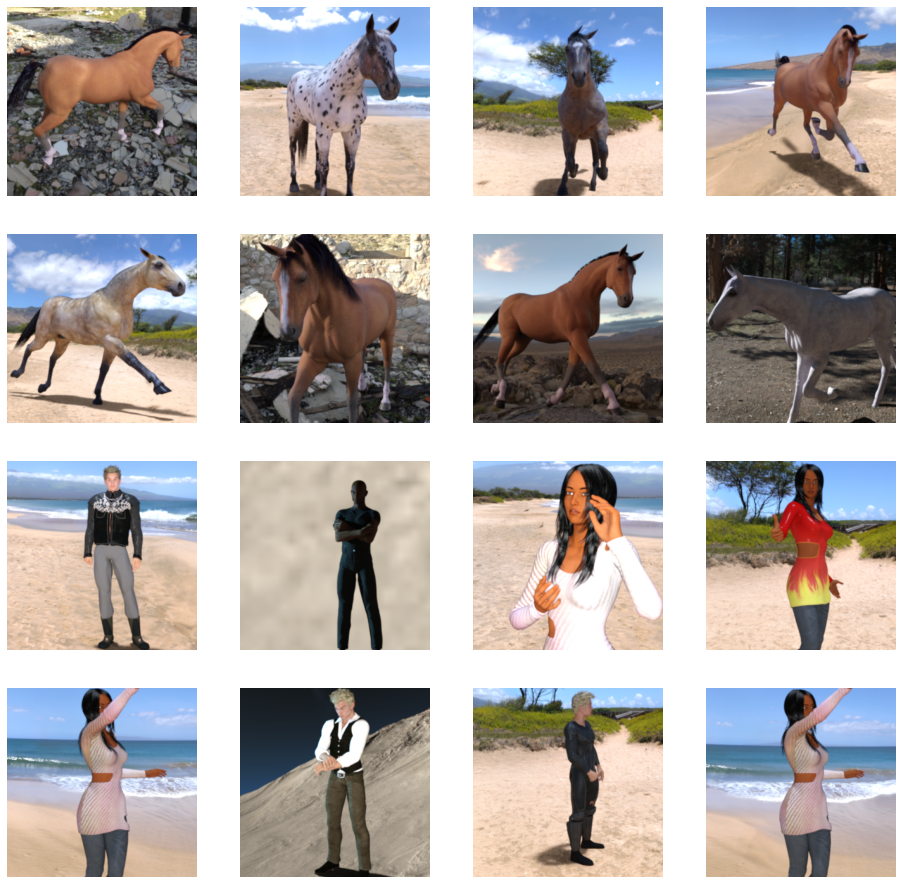

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0


# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Model # 1

In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        filepath + '//horse-or-human//',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150 ?
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [12]:
# There is no test validation
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 6s 720ms/step - loss: 0.8599 - accuracy: 0.4872
Epoch 2/15
8/8 [==============================] - 5s 640ms/step - loss: 0.7986 - accuracy: 0.5873
Epoch 3/15
8/8 [==============================] - 5s 657ms/step - loss: 0.6658 - accuracy: 0.6151
Epoch 4/15
8/8 [==============================] - 5s 642ms/step - loss: 0.6231 - accuracy: 0.7330
Epoch 5/15
8/8 [==============================] - 6s 730ms/step - loss: 0.8137 - accuracy: 0.7164
Epoch 6/15
8/8 [==============================] - 6s 724ms/step - loss: 0.8045 - accuracy: 0.7930
Epoch 7/15
8/8 [==============================] - 6s 722ms/step - loss: 0.4681 - accuracy: 0.8359
Epoch 8/15
8/8 [==============================] - 5s 646ms/step - loss: 0.2110 - accuracy: 0.9344
Epoch 9/15
8/8 [==============================] - 5s 646ms/step - loss: 0.2513 - accuracy: 0.8977
Epoch 10/15
8/8 [==============================] - 5s 633ms/step - loss: 0.3617 - accuracy: 0.9055
Epoch 11/15
8/8 [==

### Additional File(s) for test

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving IMG-20120125-00001.jpg to IMG-20120125-00001.jpg
[1.]
IMG-20120125-00001.jpg is a human


#### Evaluate

In [17]:
print(model.metrics_names)


['loss', 'accuracy']


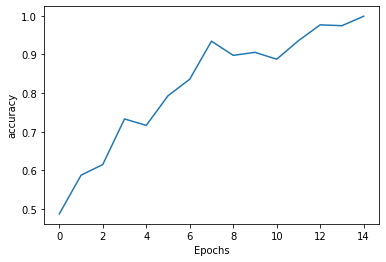

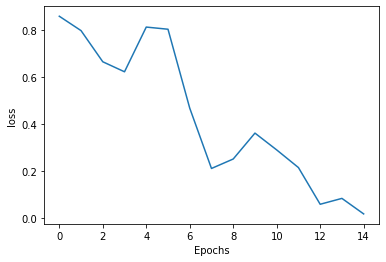

In [18]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  #plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  #plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# No validation test data is provided at the FIT time

In [ ]:
#### Predictions

#### Reports

#### Predictions go wrong!

### Conclusion : Final thoughts

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)